In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def print_scores(model_name, X_train, X_test, y_train, y_test): 
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    print("scores for  model on test set")
    print("")
    print(f'Accuracy Score : {str(accuracy_score(y_test,model_name.predict(X_test)))}')
    print(f'Precision Score : {str(precision_score(y_test,model_name.predict(X_test)))}')
    print(f'Recall Score : {str(recall_score(y_test,model_name.predict(X_test)))}')  
    print(f'F1 Score : {str(f1_score(y_test,model_name.predict(X_test)))}')
    print("")
    print("")
    print("scores for  model on train set")
    print("")
    print(f'Accuracy Score : {str(accuracy_score(y_train,model_name.predict(X_train)))}')
    print(f'Precision Score : {str(precision_score(y_train,model_name.predict(X_train)))}')
    print(f'Recall Score : {str(recall_score(y_train,model_name.predict(X_train)))}') 
    print(f'F1 Score : {str(f1_score(y_train,model_name.predict(X_train)))}')

In [3]:
data_fraud = pd.read_csv('data_fraud.csv',index_col=0) #data_local
#data_fraud = pd.read_csv('Fraud_Data.csv')


In [4]:
#data_Ip = pd.read_csv('IpAddress_to_Country.csv')

In [5]:
#Transform Ip/Country

#def transform_ip(arg) :
#    try :
#        return data_Ip.country[(data_Ip.lower_bound_ip_address < arg) & (data_Ip.upper_bound_ip_address > arg)].iloc[0]
#    except IndexError :
#        return "Pays inconnu"  
#data_fraud["country_name"] = data_fraud.ip_address.apply(transform_ip)


In [6]:
#data_fraud.to_csv('data_fraud.csv')

*EXPLORING FEATURES*

In [7]:
data_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [8]:
data_fraud.shape

(151112, 12)

In [9]:
data_fraud.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN,182
top,NaN,2015-07-21 18:54:48,2015-06-08 09:42:04,NaN,EQYVNEGOFLAWK,SEO,Chrome,M,NaN,NaN,NaN,United States
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN,58049
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,NaN
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,NaN
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,NaN
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,NaN
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,NaN
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,NaN


In [10]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  country_name    151112 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 15.0+ MB


In [11]:
data_fraud['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [12]:
data_fraud.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country_name'],
      dtype='object')

In [13]:
#remove useless features 
remove=['user_id','ip_address','device_id']
data_fraud = data_fraud.drop(remove,axis=1)

**FEATURES ENGINEERING**

In [14]:
# Reduction of country feature (improve model)
value_count_country = data_fraud.country_name.value_counts()
bool_indicator = (value_count_country <1500) & (value_count_country >6)
list_valid = list(value_count_country[bool_indicator].index)

data_filter = data_fraud[data_fraud.country_name.isin(list_valid)].copy()

In [15]:
# Transformation in time
data_filter['purchase_time'] = data_filter.purchase_time.apply( lambda x:pd.Timestamp(x))#.astype('int64')
data_filter['signup_time'] = data_filter.signup_time.apply( lambda x:pd.Timestamp(x))#.astype('int64')

In [16]:
# Work on time's features
import datetime
data_filter['p_day'] = data_filter['purchase_time'].dt.day
data_filter['p_month'] = data_filter['purchase_time'].dt.month
data_filter['s_day'] = data_filter['signup_time'].dt.day
data_filter['s_month'] = data_filter['signup_time'].dt.month
data_filter['m_s_p'] = data_filter['p_month']/(data_filter['p_month']+data_filter['s_month'])
data_filter['d_s_p'] = data_filter['p_day']/(data_filter['p_day']+data_filter['s_day'])
data_filter['d_s_msp'] = data_filter['s_day']/(data_filter['p_month']+data_filter['s_month'])
data_filter['p_s'] = data_filter['signup_time'].dt.second-data_filter['purchase_time'].dt.second
data_filter['p_h'] = data_filter['signup_time'].dt.hour*3600-data_filter['purchase_time'].dt.hour*3600
data_filter['p_m'] = data_filter['signup_time'].dt.minute*60-data_filter['purchase_time'].dt.minute*60
data_filter['sec'] = data_filter['p_s']+data_filter['p_h']+data_filter['p_m']
data_filter = data_filter.drop(['purchase_time','signup_time','p_s','p_h','p_m'],axis=1)


In [17]:
#Work on device_id not keep
#bool_device = data_filter.device_id.value_counts() > 1
#abc = bool_device.loc[bool_device==True].index.values
#data_filter.device_id = data_fraud.device_id.apply(lambda x: 2 if x in abc else 1)


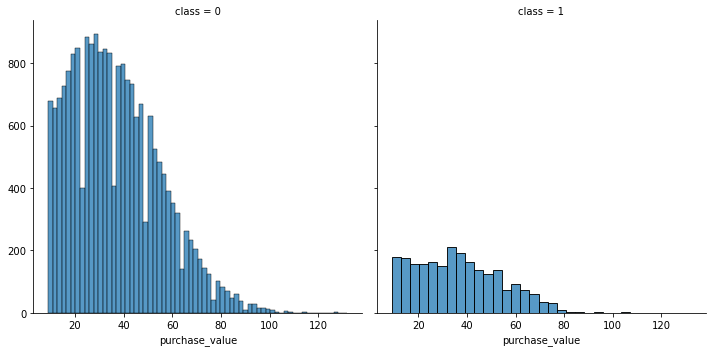

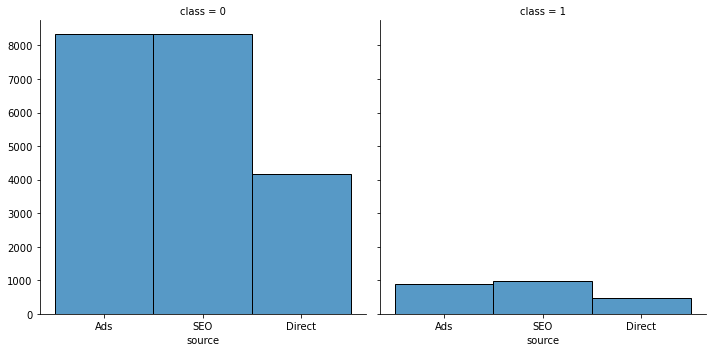

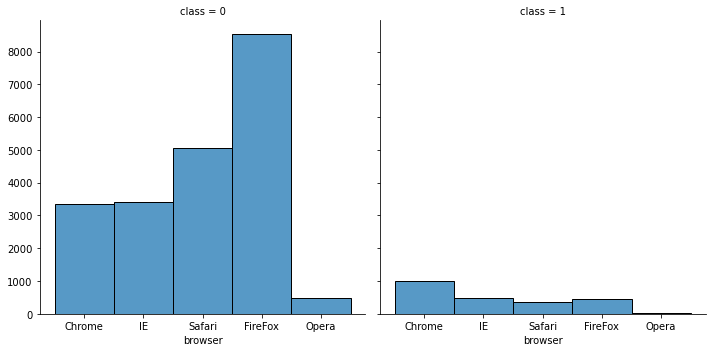

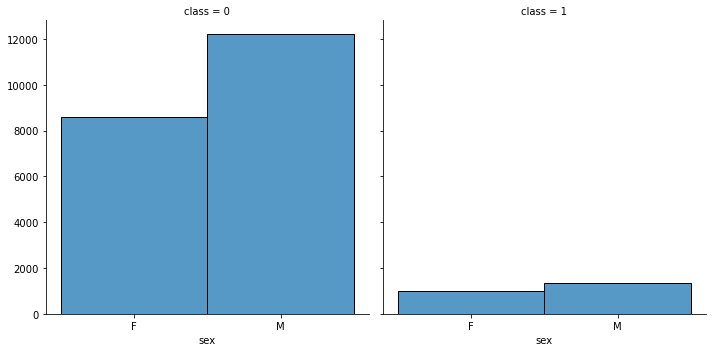

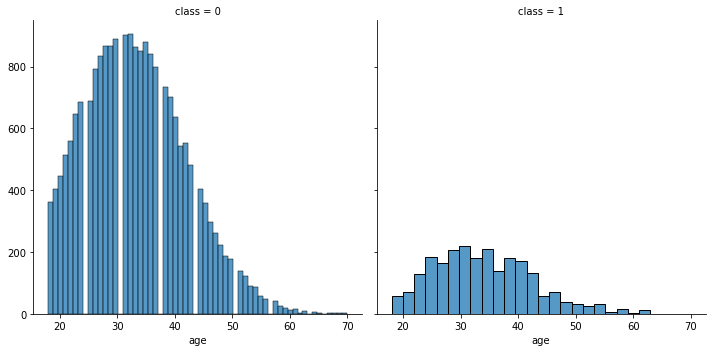

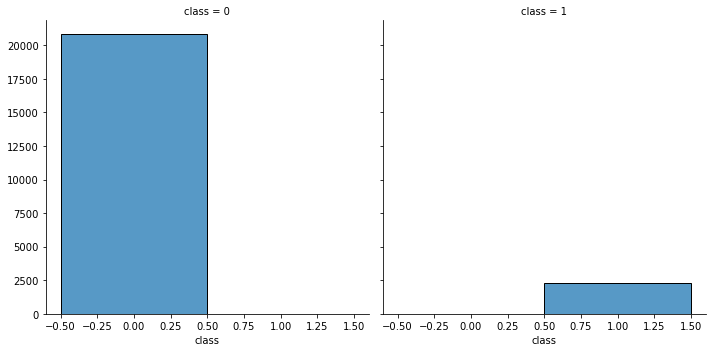

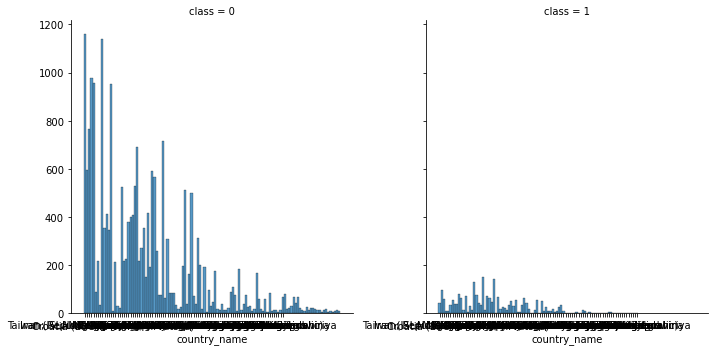

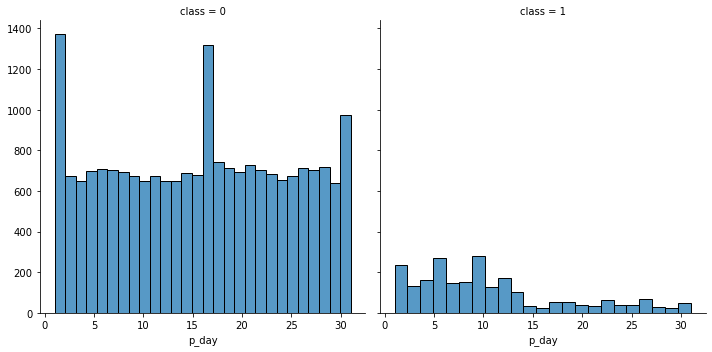

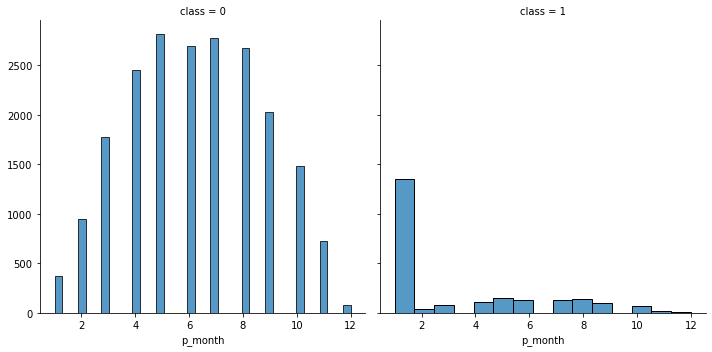

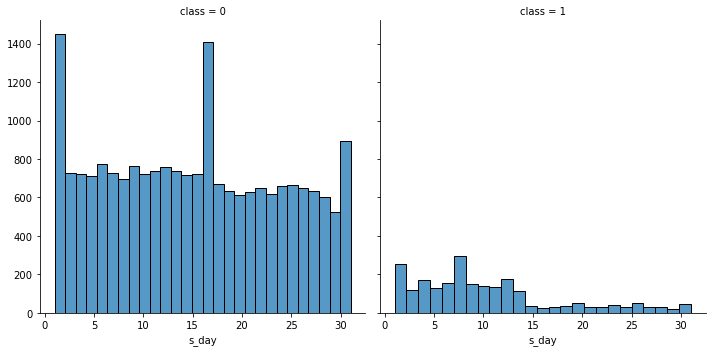

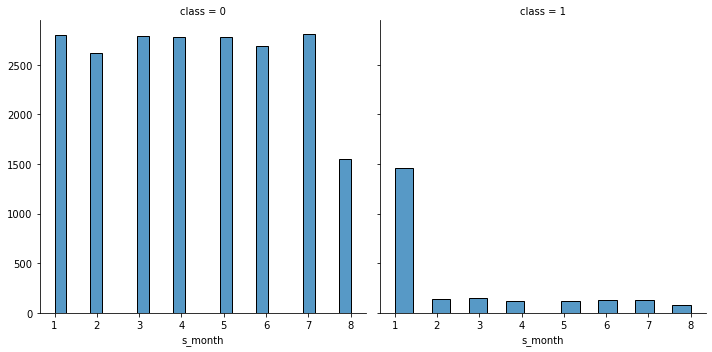

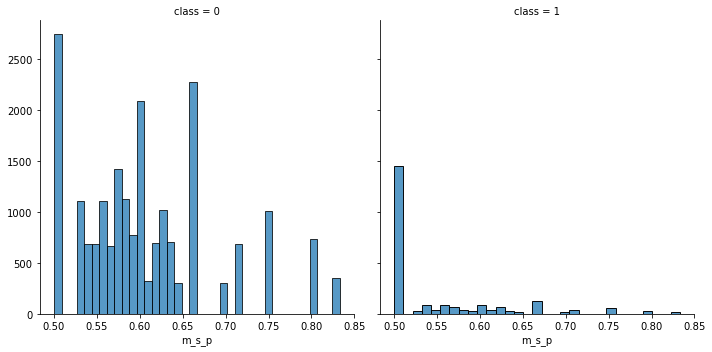

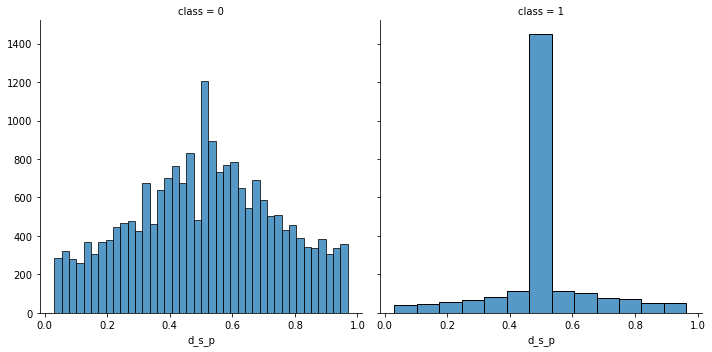

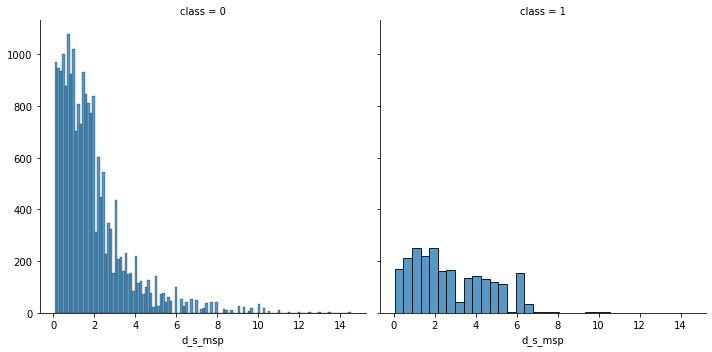

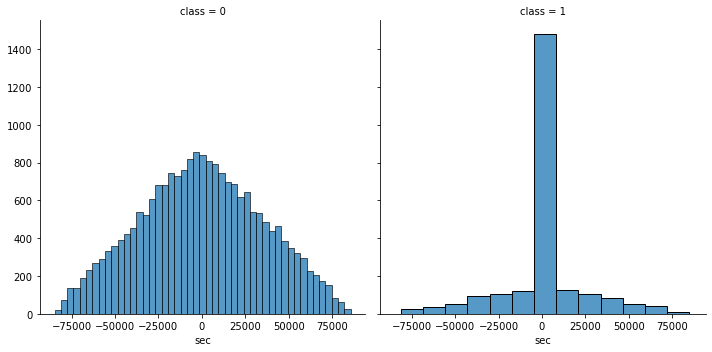

In [18]:
for col in data_filter.columns:
    g = sns.FacetGrid(data_filter, col="class", height=5, aspect=1)
    g.map(sns.histplot, col)

In [59]:
#Check for correlations between features

from heatmap import heatmap, corrplot
plt.figure(figsize=(10, 10))
corrplot(data_filter.corr(), size_scale=300);

TypeError: corrplot() got an unexpected keyword argument 'method'

<Figure size 720x720 with 0 Axes>

In [20]:
#Data and Target selection
y = data_filter['class']
X = data_filter.drop(['class'], axis=1)
X = X.values
y = y.tolist()

**Model Training**

*Preprocessing*

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import f1_score

ohe = OneHotEncoder()
sc = StandardScaler()

ct = make_column_transformer(
        (ohe,[1,2,3,5]),
        (sc,[0,4,6,7,8,9,10,11,12]),
        remainder ='passthrough')

In [23]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

*Modeling*

*test with Logistic Regression*

In [24]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(max_iter=1000)
lrm.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
 print_scores(lrm, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.8993520518358531
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


scores for  model on train set

Accuracy Score : 0.8993396284638647
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {'C':np.logspace(-3,3,7),"penalty":["l2"]}
model_lr = LogisticRegression(max_iter=1000)
grid_lr = GridSearchCV(estimator=model_lr, param_grid= params, cv=5)
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']})

In [28]:
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [29]:
print_scores(grid_lr, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.9488840892728582
Precision Score : 0.864406779661017
Recall Score : 0.5836909871244635
F1 Score : 0.6968403074295474


scores for  model on train set

Accuracy Score : 0.9490217860889959
Precision Score : 0.8772258669165885
Recall Score : 0.5738810545677498
F1 Score : 0.6938472942920683


*Test with Random Forest*

In [30]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier(random_state=0)
cls.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [31]:
 print_scores(cls, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.9575233981281498
Precision Score : 1.0
Recall Score : 0.5779685264663805
F1 Score : 0.7325475974614687


scores for  model on train set

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [32]:
params = {'max_depth' : [4,10],
            'min_samples_split' : [2,3],
          'min_samples_leaf': [2,3]             
}

rfgs = RandomForestClassifier(random_state=0)
grid_rfc = GridSearchCV(estimator=rfgs, param_grid= params, cv=5,n_jobs=-1)
grid_rfc.fit(X_train,y_train)            

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]})

In [33]:
grid_rfc.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [34]:
 print_scores(grid_rfc, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.9575233981281498
Precision Score : 1.0
Recall Score : 0.5779685264663805
F1 Score : 0.7325475974614687


scores for  model on train set

Accuracy Score : 0.9566746898722459
Precision Score : 0.9989258861439313
Recall Score : 0.5702023298589822
F1 Score : 0.7259953161592507


*Test with SVC Model*

In [35]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
param ={'n_neighbors':[2,5,7,10,15],
           'leaf_size':[10,15,20,25],
       }

grid_kn = GridSearchCV(estimator=kn, param_grid= param, cv=5,verbose=1,n_jobs=-1)

grid_kn.fit(X_train,y_train)          

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.8s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [10, 15, 20, 25],
                         'n_neighbors': [2, 5, 7, 10, 15]},
             verbose=1)

In [36]:
grid_kn.best_params_

{'leaf_size': 10, 'n_neighbors': 7}

In [37]:
print_scores(grid_kn, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.9573794096472282
Precision Score : 0.9975308641975309
Recall Score : 0.5779685264663805
F1 Score : 0.7318840579710144


scores for  model on train set

Accuracy Score : 0.956489538974264
Precision Score : 0.9957173447537473
Recall Score : 0.5702023298589822
F1 Score : 0.7251461988304093


*Kernel rbf*

In [38]:
from sklearn.svm import SVC
#kernel
params={'C':np.arange(-5,5,1),'gamma':np.arange(0.0005,0.0015,0.0001)}
svc = SVC()
grid_svc = GridSearchCV(estimator=svc, param_grid= params, cv=5,verbose=1,n_jobs=-1)
grid_svc.fit(X_train,y_train)            


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.1min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]),
                         'gamma': array([0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001 , 0.0011, 0.0012,
       0.0013, 0.0014])},
             verbose=1)

In [40]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.0005}

In [48]:
 print_scores(grid_svc, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.9566594672426206
Precision Score : 0.9853658536585366
Recall Score : 0.5779685264663805
F1 Score : 0.7285843101893599


scores for  model on train set

Accuracy Score : 0.9563043880762822
Precision Score : 0.9914802981895634
Recall Score : 0.5708154506437768
F1 Score : 0.7245136186770428


*BOOSTING AdaBoost*

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
regressor = AdaBoostClassifier(n_estimators=100)
parameters = {'n_estimators':[500,600,700,800],
              "learning_rate":[1.0, 0.5, 0.1]}

regressor_ada_best = GridSearchCV(regressor, parameters)
regressor_ada_best.fit(X_train, y_train)


GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'learning_rate': [1.0, 0.5, 0.1],
                         'n_estimators': [500, 600, 700, 800]})

In [51]:
regressor_ada_best.best_params_

{'learning_rate': 0.5, 'n_estimators': 600}

In [52]:
print_scores(regressor_ada_best, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.9575233981281498
Precision Score : 1.0
Recall Score : 0.5779685264663805
F1 Score : 0.7325475974614687


scores for  model on train set

Accuracy Score : 0.9568598407702278
Precision Score : 1.0
Recall Score : 0.5714285714285714
F1 Score : 0.7272727272727273


*Stacking*

In [53]:
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2)
knn = KNeighborsClassifier(leaf_size=20, n_neighbors=7)
logreg = LogisticRegression(C=0.01, penalty='l2')
svc = SVC(kernel='rbf',C=1, gamma=0.0005)


In [54]:
from sklearn.ensemble import StackingClassifier

st = StackingClassifier(estimators=[("rfc",rfc),
    ("knn",knn),
    ("logreg",logreg),
    ("svc",svc)])
st.fit(X_train, y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2)),
                               ('knn',
                                KNeighborsClassifier(leaf_size=20,
                                                     n_neighbors=7)),
                               ('logreg', LogisticRegression(C=0.01)),
                               ('svc', SVC(C=1, gamma=0.0005))])

In [55]:
print_scores(st, X_train, X_test, y_train, y_test)

scores for  model on test set

Accuracy Score : 0.9573794096472282
Precision Score : 0.9975308641975309
Recall Score : 0.5779685264663805
F1 Score : 0.7318840579710144


scores for  model on train set

Accuracy Score : 0.9563661050422761
Precision Score : 0.9935897435897436
Recall Score : 0.5702023298589822
F1 Score : 0.7245812232177639
